# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno


# Импорт библиотек для проверки на стат значимость

In [2]:
from scipy import stats
from scipy.stats import ttest_ind, ttest_1samp, shapiro, levene, mannwhitneyu, pearsonr, \
spearmanr, kendalltau, f_oneway, kruskal


### Параметр отображения всех столбцов

In [3]:
pd.set_option('display.max_columns', None)

### Чтение документа

In [4]:
df = pd.read_excel('F:/Рабочий стол/Итоговый проект Нетология/Empires___Puzzles_Whale.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
df_non_paying = pd.read_excel('F:/Рабочий стол/Итоговый проект Нетология/Empires___Puzzles_Non-Paying.xlsx')

C:\Users\user\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Ended1,Ended2,Limits,New Experience,Offer Time,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,NaN,1,1,Idle,Start,Loading,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,NaN,1,1,Player,Pop-Up,Accept the Terms of Service,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,NaN,1,1,Campaign,Dialog Start,"начало игры, начало истории",NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,NaN,1,1,Campaign,Start Battle,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,NaN,1,1,Tutorial,Advice about moves,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [7]:
df_non_paying.head()

,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,Tag,Action,Info,Shortage1,Shortage2,Shortage3,Ended1,Ended2,Limits,New expirience,Offer Time,Team Power,Name,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,Idle,Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,Player,Privacy Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,Campaign,Dialog Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,Campaign,Start Battle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,Tutorial,Advice about moves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10380 entries, 0 to 10379
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              10380 non-null  datetime64[ns]
 1   Day               10380 non-null  int64         
 2   Session           10380 non-null  int64         
 3   Video #           10380 non-null  float64       
 4   Videolink         10380 non-null  object        
 5   Videolength       10380 non-null  object        
 6   Timestamp         10380 non-null  object        
 7   Timelink          0 non-null      float64       
 8   Player Level      10380 non-null  int64         
 9   Stronghold Level  10380 non-null  int64         
 10  Tag               10378 non-null  object        
 11  Action            10378 non-null  object        
 12  Info              2405 non-null   object        
 13  Shortage1         301 non-null    object        
 14  Shortage2         15 n

In [9]:
df_non_paying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8457 non-null   datetime64[ns]
 1   Day               8457 non-null   int64         
 2   Session           8457 non-null   int64         
 3   Video #           8457 non-null   float64       
 4   Videolink         8457 non-null   object        
 5   Videolength       8457 non-null   object        
 6   Timestamp         8457 non-null   object        
 7   Timelink          8457 non-null   object        
 8   Player Level      8454 non-null   float64       
 9   Stronghold Level  8457 non-null   int64         
 10  Tag               8457 non-null   object        
 11  Action            8457 non-null   object        
 12  Info              2464 non-null   object        
 13  Shortage1         311 non-null    object        
 14  Shortage2         30 non

In [10]:
df.replace(['nan'], np.NaN, inplace = True)
df_non_paying.replace(['nan'], np.NaN, inplace = True)
# Сразу заменим все некорректные nan

<Axes: >

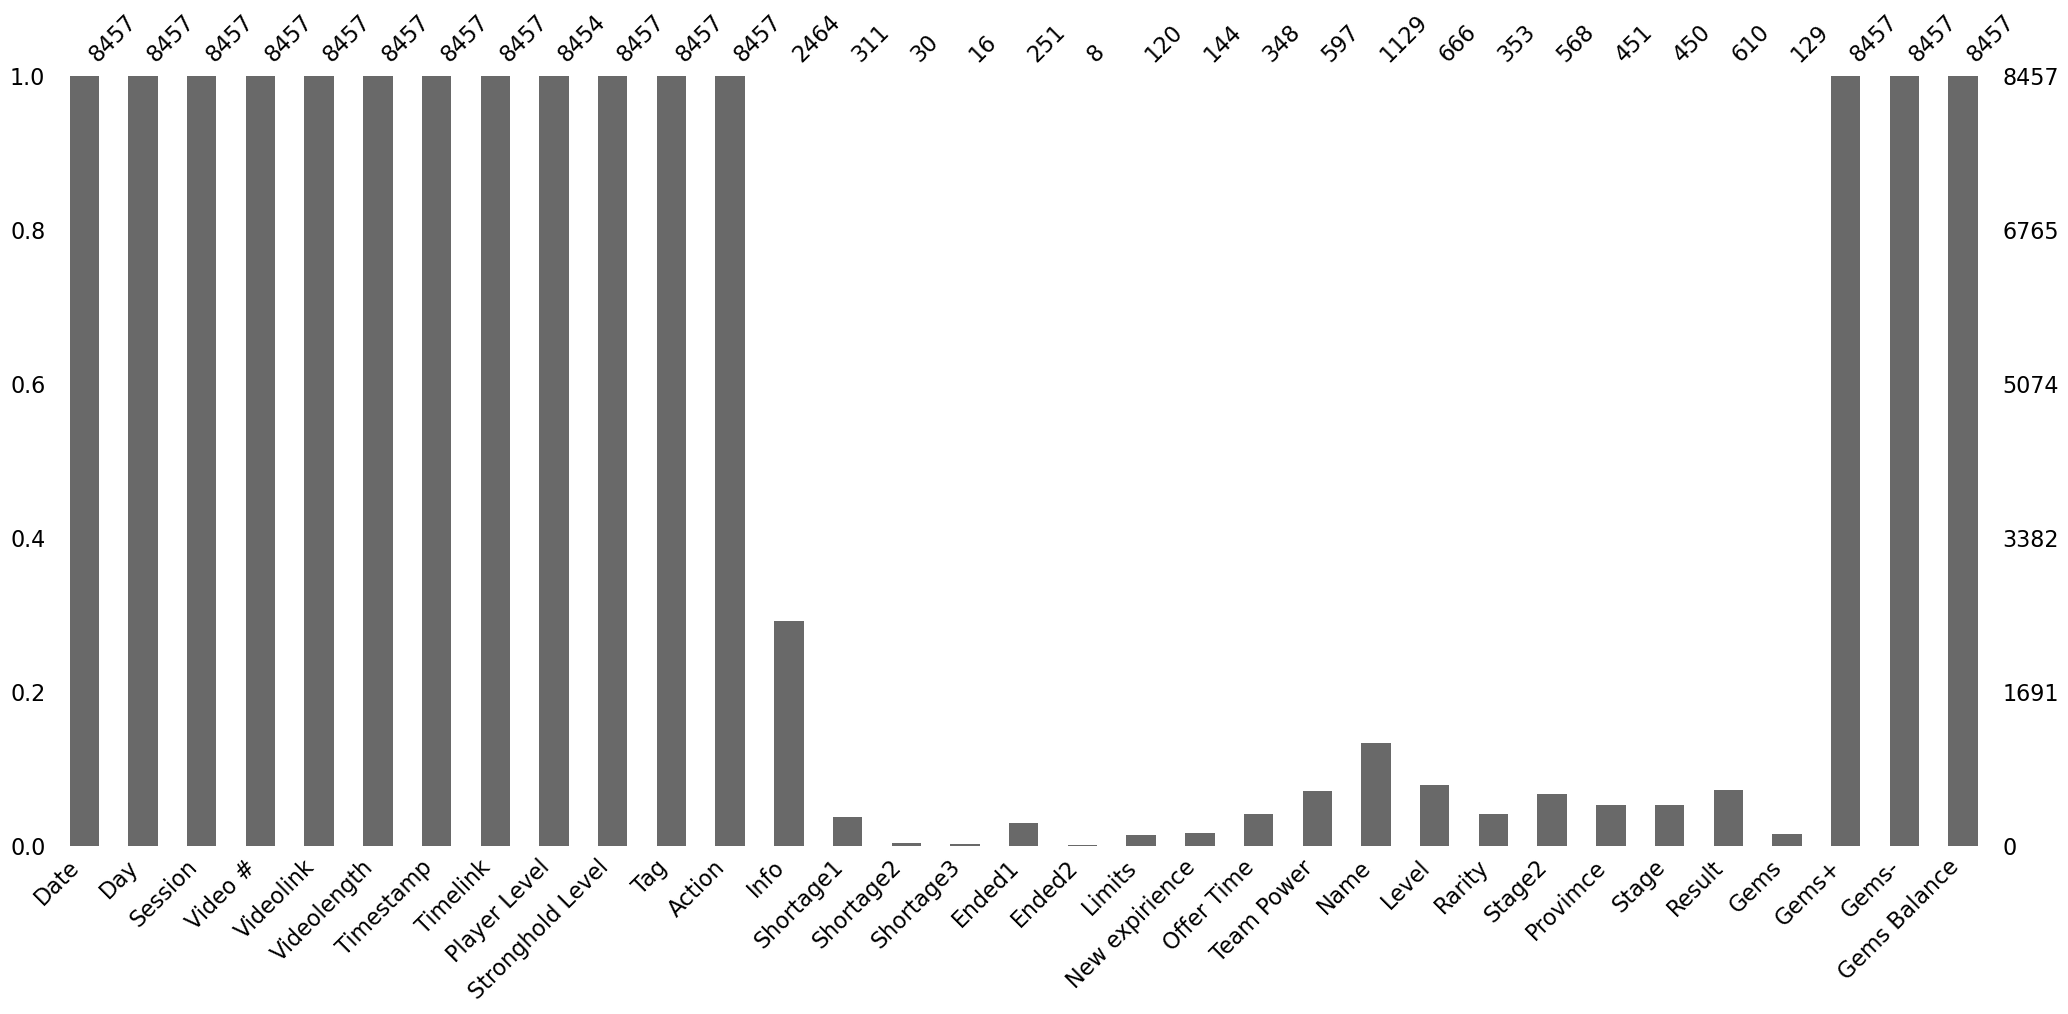

In [11]:
msno.bar(df_non_paying)

## В чем разница между 3 разными Shortage и 2 Stage?

In [12]:
df_non_paying[['Stage', 'Stage2']].dropna().tail()

,Stage,Stage2
8200,1.0,5-1
8203,2.0,5-2
8204,2.0,5-2
8227,1.0,9-1
8228,1.0,9-1


In [13]:
df[['Stage']].dropna().tail()

,Stage
10326,17-1
10328,2-3-5
10329,2-3-5
10338,12-5
10339,12-5


## Не понимаю зачем нужен обычный Stage в датасете неплатящего пользователя. Удалю его и переименую Stage2 в Stage

In [14]:
df_non_paying.drop(columns = 'Stage', inplace = True)
df_non_paying.rename(columns={'Stage2': 'Stage'}, inplace = True)

In [15]:
df_non_paying[['Stage']].dropna()

,Stage
61,1-1
63,1-1
73,1-2
74,1-2
90,1-3
...,...
8341,20
8348,20
8349,20
8351,1


# Также переименую колонку New expirience в New Experience как в другом датафрейме

In [16]:
df_non_paying.rename(columns={'New expirience': 'New Experience'}, inplace = True)

In [17]:
df_non_paying['Shortage3'].unique()

array([nan, 'Hero Level'], dtype=object)

In [18]:
df_non_paying[['Provimce']].dropna()

,Provimce
63,1.0
73,1.0
74,1.0
90,1.0
92,1.0
...,...
8200,5.0
8203,5.0
8204,5.0
8227,9.0


### Отбрасываю столбцы, которые не потребуются для анализа

In [19]:
df_non_paying.drop(columns = ['Video #', 'Videolink', 'Videolength', 'Timestamp', 'Timelink', 'Info'
                              'Shortage2', 'Shortage3', 'Ended2', 'Provimce', 'Limits', 'Offer Time', 'Info'], inplace = True)
df.drop(columns = ['Video #', 'Videolink', 'Videolength', 'Timestamp', 'Timelink'],inplace = True)

KeyError: "['InfoShortage2'] not found in axis"

In [ ]:
#df['Info'] = df['Info'].astype(str)

In [ ]:
df.isnull().sum()

In [ ]:
df_non_paying.isnull().sum()

In [ ]:
df_non_paying[['Player Level']].dropna()
df_non_paying[df_non_paying['Player Level'].isnull()]

In [ ]:
df_non_paying.loc[df_non_paying.index > 2184]

## Т.к. на предыдущих и следущих строках уровень игрока равняется 7, чтобы не удалять эти строки, просто поставлю уровень игрока 7

In [ ]:
df_non_paying.fillna({'Player Level': 7}, inplace=True)

In [ ]:
df_non_paying.loc[df_non_paying.index > 2184]

In [ ]:
df_non_paying.isnull().sum()

## Преобразуем Player Level в int64

In [ ]:
df['Player Level'] = df['Player Level'].astype('int64')
df_non_paying['Player Level'] = df_non_paying['Player Level'].astype('int64')

### Проверим 2 пустых ячейки для столбцов Tag и Action

In [ ]:
df.loc[df['Tag'].isnull()]

In [ ]:
df.iloc[4945:4950]

In [ ]:
df.iloc[6664:6668]

### Т.к. в этих строках нет чего-либо отличительного, то я их удалю

In [ ]:
df.drop(index = [4947, 6666], inplace = True)

In [ ]:
msno.bar(df)

### Для следующих визуализаций я буду использовать колонки Shortage1 и Ended1, после чего удалю из-за большого количества пропусков, вторые их колонки не буду использовать из-за очень малого количества не самых важных данных

# Проверка на выбросы и их анализ

In [ ]:
plt.figure(figsize = (15,6))
df.boxplot()

In [ ]:
df.loc[df['Gems-'] < -8000]

In [ ]:
df.loc[df['Action'] == 'Atlantis Summon']

In [ ]:
df.loc[(df.index > 7264) & (df.index < 7270)]

In [ ]:
df.loc[(df.index > 8178) & (df.index < 8185)]

### Выброс на трату гемов обоснован. Игрок тратил большое количество гемов дважды на призыв персонажей из акции Atlantis Summon, оттого и низкие показатели Gems и Gems-

In [ ]:
df.loc[df['Gems Balance'] > 15000]

### Выброс на баланс гемов обоснован. Игрок разово приобрел акцию 10000 Gems за 99.99 долларов, отчего параметр сильно возрос. В остальном ничего критичного

In [ ]:
plt.figure(figsize = (15,6))
df_non_paying.boxplot()

In [ ]:
df_non_paying.loc[df_non_paying['Gems-'] < -250]

In [ ]:
df_non_paying.loc[(df_non_paying.index > 6707) & (df_non_paying.index < 6715)]

### Выброс на трату гемов обоснован. Игрок потратил все 350 гемов, которые у него были на балансе, на призыв героя из акции Valhalla Summon. В остальном ничего критичного

# Расчеты

In [ ]:
print(f'Количество сессий платящего пользователя {df["Session"].nunique()}')
print(f'Количество сессий не платящего пользователя {df_non_paying["Session"].nunique()}')

In [ ]:
viewed_ads = len(df[(df['Tag'] == 'Mystic Vision') & (df['Action'] == 'Finish')])
viewed_ads2 = len(df_non_paying[(df_non_paying['Tag'] == 'Mystic Vision') & 
                                (df_non_paying['Action'] == 'Finish')])
print('Количество просмотренной рекламы платящего игрока', viewed_ads)
print('Количество просмотренной рекламы не платящего игрока', viewed_ads2)

In [ ]:
сompleted_raids = len(df[(df['Tag'] == 'Raid') & (df['Action'] == 'Finish Battle')])
сompleted_raids2 = len(df_non_paying[(df_non_paying['Tag'] == 'Raid') &
                                     (df_non_paying['Action'] == 'Finish Battle')])
print('Количество рейдов платящего игрока', сompleted_raids)
print('Количество рейдов не платящего игрока', сompleted_raids2)

In [ ]:
viewed_summon = len(df[(df['Tag'] == 'Summon') & (df['Action'] == 'Start')])
viewed_summon2 = len(df_non_paying[(df_non_paying['Tag'] == 'Summon') & (df_non_paying['Action'] == 'Start')])

print('Количество просмоторв призывов платящего игрока', viewed_summon)
print('Количество просмоторв призывов не платящего игрока', viewed_summon2)

In [ ]:
viewed_event = len(df[(df['Tag'] == 'Event') & (df['Action'] == 'Start')])
viewed_event2 = len(df_non_paying[(df_non_paying['Tag'] == 'Event') & (df_non_paying['Action'] == 'Start')])

print('Количество просмоторв призывов платящего игрока', viewed_event)
print('Количество просмоторв призывов не платящего игрока', viewed_event2)

In [ ]:
viewed_vip = len(df[(df['Tag'] == 'VIP')])
viewed_vip2 = len(df_non_paying[(df_non_paying['Tag'] == 'VIP')])

print('Количество просмоторв VIP пропуска платящего игрока', viewed_vip)
print('Количество просмоторв VIP пропуска не платящего игрока', viewed_vip2)

In [ ]:
viewed_shop = len(df[(df['Tag'] == 'Shop')])
viewed_shop2 = len(df_non_paying[(df_non_paying['Tag'] == 'Shop')])

print('Количество просмоторв магазина платящего игрока', viewed_shop)
print('Количество просмоторв магазина не платящего игрока', viewed_shop2)

In [ ]:
end_event = len(df[(df['Tag'] == 'Event') & (df['Action'] == 'Finish Battle')])
end_event2 = len(df_non_paying[(df_non_paying['Tag'] == 'Event') & (df_non_paying['Action'] == 'Finish Battle')])

print('Количество пройденных ивентов платящего игрока', end_event)
print('Количество пройденных ивентов не платящего игрока', end_event2)

# Визуализация и анализ 

# Нехватка чего на каждом уровне для каждого пользователя

In [ ]:
# Платящий пользователь
table_data = df[['Day', 'Shortage1', 'Player Level']].dropna()
pvt_player_level_x_shortage = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Shortage1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_shortage

### Рекруты и войска это разное или одно и то же? Для удобства объединю в рекрутов

In [ ]:
df['Shortage1'].replace('Troops', 'Recruits', inplace = True)

In [ ]:
# НЕплатящий пользователь
table_data = df_non_paying[['Day', 'Shortage1', 'Player Level']].dropna()
pvt_non_paying_player_level_x_shortage = pd.pivot_table(data = table_data, values = 'Player Level', 
                                                        index = 'Shortage1', columns = ['Player Level'], aggfunc = 'count',
                                                        fill_value = 0)
pvt_non_paying_player_level_x_shortage

### Обнаружено, что у неплатящего пользователя была нехватка редких героев? Соединим редких героев с героями

In [ ]:
df_non_paying['Shortage1'].replace('Rare heroes', 'Heroes', inplace = True)

In [ ]:
fig = plt.figure(figsize = (20,10))

# Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_shortage, annot = True, ax = ax1)
ax1.set_title('Сколько раз нехватало ресурсов на уровнях игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Ресурс')


# НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_shortage, annot = True, ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень игрока')
ax2.set_ylabel('Ресурс')
plt.show()

### Можно заметить, что у обоих пользователей пища кончалась довольно часто и неоднократно, но у неплатящего была нехватка аж 34 раза на 9 уровне и 21 на 11. Связано с улучшением героев, т.к. оно требует больше всего пищи?
### Что интересно, у неплатящего пользователя нехватка железа была значительно реже, чем у платящего. Связано со скоростью развития?
### Да и в целом у платящего игрока нехватка чего-либо была чаще, пусть и не всегда большое количество раз

# Какие ресурсы кончились на каждом уровне

In [ ]:
# Платящий пользователь
table_data = df[['Day', 'Ended1', 'Player Level']].dropna()
pvt_player_level_x_ended = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Ended1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_ended

In [ ]:
# НЕплатящий пользователь
table_data = df_non_paying[['Day', 'Ended1', 'Player Level']].dropna()
pvt_non_paying_player_level_x_ended = pd.pivot_table(data = table_data, values = 'Player Level', index = 'Ended1', columns = ['Player Level'], aggfunc = 'count',
              fill_value = 0)
pvt_non_paying_player_level_x_ended

In [ ]:
fig = plt.figure(figsize = (20,10))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_ended, annot = True, cmap = 'mako', ax = ax1)
ax1.set_title('Сколько раз кончались ресурсы на уровнях игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Ресурс')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_ended, annot = True, cmap = 'mako', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень игрока')
ax2.set_ylabel('Ресурс')
plt.show()

### Больше всего у обоих игроков кончалась именно энергия. Она кончалась на нескольких уровнях больше, чем что-либо другое. Также относительно часто кончались рекруты и еда.
### Зато попытки кончались у платящего игрока лишь один раз, у неплатящего же ни разу, как и гемы. Это может говорить о том, что баланс требуемых попыток и их восполнения хорошо сбалансированны

# Получение нового опыта

In [ ]:
# Платящий игрок
table_data = df[['Player Level', 'New Experience', 'Tag']].dropna()
pvt_player_level_x_newex_tag = pd.pivot_table(data = table_data, values = 'New Experience', index = 'Tag', 
                                              columns = 'Player Level', aggfunc = 'count',
              fill_value = 0)
pvt_player_level_x_newex_tag

In [ ]:
# НЕплатящий игрок
table_data = df_non_paying[['Player Level', 'New Experience', 'Tag']].dropna()
pvt_non_paying_player_level_x_newex_tag = pd.pivot_table(data = table_data, values = 'New Experience', index = 'Tag', 
                                              columns = 'Player Level', aggfunc = 'count',
              fill_value = 0)
pvt_non_paying_player_level_x_newex_tag

In [ ]:
fig = plt.figure(figsize = (25,20))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_newex_tag, annot = True, cmap = 'magma', ax = ax1)
ax1.set_title('Количество нового опыта на каждом уровне игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень игрока')
ax1.set_ylabel('Активность')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_non_paying_player_level_x_newex_tag, annot = True, cmap = 'magma', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уроовень игрока')
ax2.set_ylabel('Активность')
plt.show()

### Самое большое количество нового опыта оба игрока получают именно на обучении, строительстве и кампании.
### У платящего пользователя, в отличие от неплатящего, наблюдается так же большое количество нового опыта за призывы героев
### Примечательное отличие, неплатящий игрок получил больше нового опыта за активность в альянсе, нежели платящий
### Также насчет ивентов, оба игрока получили к ним доступ на 10 уровне, и если платящий игрок еще получал новый опыт в течение следующих своих уровней, неплатящий ничего не получал

In [ ]:
df.drop(columns = ['Shortage1', 'Shortage2', 'Ended1', 'Ended2', 'Limits', 'New Experience', 'Offer Time'], inplace = True)
#df.drop(columns = ['Gems', 'Gems+', 'Gems-'])

# Попарный анализ параметров

# Матрица корреляции

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df.corr(), annot = True)

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df_non_paying.corr(), annot = True)

### Наибольшая корреляция наблюдается между днями и сессиями, уровнями и днями и сессиями, мощью команды и всеми предыдущими параметрами, что вполне логично. Больше играешь - больше уровень, больше сессий, больше мощь

# Построение матрицы диаграмм рассеивания

## Платящий пользователь

In [ ]:
sns.pairplot(df)
plt.show()

## Неплатящий пользователь

In [ ]:
sns.pairplot(df_non_paying)
plt.show()

### Какую-либо линейную зависимость или приближенную к ней можно заметить лишь между такими параметрами, как: День и сессия, день/сессия и уровень игрока, день/сессия/уровень игрока и уровень главного здания и некоторую зависимость день/сессия/уровень игрока/уровень здания и мощь отряда
### В принципе, никаких новых открытий после корреляционного анализа

# Мощь отряда

In [ ]:
# Платящий игрок
lineplot_day_x_team_power = df[['Day', 'Team Power']]
lineplot_day_x_team_power
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')

# НЕплатящий игрок
lineplot_day_x_team_power2 = df_non_paying[['Day', 'Team Power']]
sns.lineplot(data = lineplot_day_x_team_power2, x = 'Day', y = 'Team Power', color = 'r')
plt.title('График мощи отряда в течение 14 дней')
plt.legend(['Платящий', '', 'НЕплатящий'])

## Интересно узнать, почему наблюдается сильный спад мощи с 13 дня

In [ ]:
lineplot_day_x_team_power.loc[(lineplot_day_x_team_power['Day'] > 12) & (lineplot_day_x_team_power['Team Power'] < 2500)].dropna()

In [ ]:
df.loc[df['Team Power'] < 100]

## Откуда нулевое и единичное значение мощи?
## Оказалось, игра учитывает каждое редактирование отряда, из-за чего при полностью пустом отряде в логах стоит 0. Почему стоит 1 в логах, так и не понял

In [ ]:
df.loc[df.index > 2515]

In [ ]:
df['Team Power'].replace([0, 1], np.NaN, inplace = True)
df.loc[(df.index == 2517) & (df.index == 9044)]

In [ ]:
df_non_paying['Team Power'].replace([0, 1], np.NaN, inplace = True)

### Т.к. в этих строках содержится и другая полезная информация, а мощь в предыдущих и следующих строках  не меняется, просто заменю значения на NaN

In [ ]:
lineplot_day_x_team_power
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')

## Удаление этих строк не изменило график.

In [ ]:
df.loc[(df['Day'] == 14) & (df['Team Power'] < 3000)]

## Чуть больше изучив датасет, пришел к выводу, что есть большое количество активностей, под которые игрок может менять состав отряда, из-за чего рост мощи тяжего проследить

## Решил избежать других активностей, выбрав только повышение уровня. График стал более плавным и можно заметить как изначально резко повышается мощь в начале игры и дальнее растет плавнее

In [ ]:
# Платящий игрок
lineplot_day_x_team_power = df[['Team Power', 'Day', 'Action']].loc[df['Action'] == 'Level Up']
sns.lineplot(data = lineplot_day_x_team_power, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')


# НЕплатящий игрок
lineplot_day_x_team_power2 = df_non_paying[['Team Power', 'Day', 'Action']].loc[df_non_paying['Action'] == 'Level Up']
sns.lineplot(data = lineplot_day_x_team_power2, x = 'Day', y = 'Team Power')
plt.title('График мощи отряда в течение 14 дней')
plt.legend(['Платящий', '', 'НЕплатящий'])

# Смотрим распределение и проводим тест

In [ ]:
# Распределение мощи отряда для платящего пользователя
lineplot_day_x_team_power['Team Power'].plot(kind = 'hist')

In [ ]:
# Распределение мощи отряда для платящего пользователя
lineplot_day_x_team_power2['Team Power'].plot(kind = 'hist')

## Т.к. гистограмма показывает ненормальное распределение и количество пустых значений превышает количество заполненных, я предпочту удалить пустые, вместо того, чтобы заполнять их медианой
## Для нестандартного отклонения буду использовать непараметрические тесты

In [ ]:
# Проверка на нормальность распределения
median_paying = lineplot_day_x_team_power['Team Power'].median()
pvalue = shapiro(lineplot_day_x_team_power['Team Power'].dropna())
pvalue2 = shapiro(lineplot_day_x_team_power['Team Power'].fillna(median_paying))
print(pvalue,'\n', pvalue2)

### В любом случае, что я удаляю пустые строки, что заполняю их медианой, распределение ненормально, но мне кажется, если я их удалю, я не так сильно искажу данные

In [ ]:
def stat_tests(sample1, sample2):
    
    # Непараметрический тест Манна-Уитни
    t_stat, p_value = mannwhitneyu(sample1, sample2)
    print('Тест Манна-Уитни:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')
    
    # Тест Краскелла-Уоллиса
    t_stat, p_value = kruskal(sample1, sample2)
    print('Тест Краскелла-Уоллиса:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')
    
    # Тест Колмогорова-Смирнова
    t_stat, p_value = stats.ks_2samp(sample1, sample2)
    print('Тест Колмогорова-Смирнова:\n Test Stat = %.4f, p-value = %.4f' % (t_stat, p_value),'\n')

In [ ]:
sample1 = lineplot_day_x_team_power['Team Power'].dropna()
sample2 = lineplot_day_x_team_power2['Team Power'].dropna()
stat_tests(sample1, sample2)

### p-value в тесте Манна-Уитни, Краскелла-Уоллиса и Колмогорова-Смирнова равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# Количество сессий

In [ ]:
df.groupby('Day')['Session'].nunique ()

In [ ]:
# Платящий игрок
lineplot_day_session = df.groupby('Day')['Session'].nunique ()
sns.lineplot(data = lineplot_day_session)
plt.title('Количество сессий каждый день')
plt.ylabel('Количество сессий')
plt.xlabel('День')

# НЕплатящий игрок
lineplot_day_session2 = df_non_paying.groupby('Day')['Session'].nunique ()
sns.lineplot(data = lineplot_day_session2)

plt.legend(['Платящий', '', 'НЕплатящий'])

### С первого дня у платящего игрока не менее 3 сессий. Почему-то на 6 день у игрока была лишь одна сессия. Далее он вернулся на прежний уровень, но возможно начался постепенный спад активности
### У неплатящего игрока все стабильно. Уже на второй день без каких-либо изменений по 3 сессии в день

In [ ]:
# Создаю 2 датафрейма на основе датафреймов платящего и неплатящего игрока, чтобы избежать 
# группировки в датафреймах, которые использовал для визуализации
day_session = df[['Day', 'Session']]
day_session2 = df_non_paying[['Day', 'Session']]

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_session['Session'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_session2['Session'].hist(ax = ax2)

In [ ]:
print(day_session['Day'].isnull().sum())
print(day_session['Session'].isnull().sum())

In [ ]:
# Проверка на нормальность распределения
pvalue = shapiro(day_session['Session'])
pvalue2 = shapiro(day_session2['Session'])
print(pvalue,'\n', pvalue2)

# p-value = 0, распределение ненормально

### Пустые значения отсутсвуют, распределение ненормально, будем использовать непараметрические тесты

In [ ]:
sample1 = day_session['Session']
sample2 = day_session2['Session']
stat_tests(sample1, sample2)

### Ситуация такая же, как и с мощью отряда: p-value во всех тестах равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# Главное здание и уровень игрока

In [ ]:
df.groupby('Player Level')['Stronghold Level'].max()

In [ ]:
# Платящий игрок
lineplot_playerlvl_strongholdlvl = df.groupby('Player Level')['Stronghold Level'].max()
sns.lineplot(data = lineplot_playerlvl_strongholdlvl, x = lineplot_playerlvl_strongholdlvl.index,
            y = lineplot_playerlvl_strongholdlvl.values, size = 5)
plt.title('Рост уровня главного здания с уровнем игрока')
plt.ylabel('Уровень главного здания')
plt.xlabel('Уровень игрока')

# НЕплатящий игрок
lineplot_playerlvl_strongholdlvl2 = df_non_paying.groupby('Player Level')['Stronghold Level'].max()
sns.lineplot(data = lineplot_playerlvl_strongholdlvl2, x = lineplot_playerlvl_strongholdlvl2.index,
            y = lineplot_playerlvl_strongholdlvl2.values, size = 5)

plt.legend(['Платящий', '', 'НЕплатящий'])

# Количество героев разного уровня с уровнем игрока

In [ ]:
# Платящий игрок
pvt_player_level_x_hero_level = pd.pivot_table(data = df, index = 'Player Level', columns = 'Level', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_level

In [ ]:
# НЕплатящий игрок
pvt_player_level_x_hero_level2 = pd.pivot_table(data = df_non_paying, index = 'Player Level', columns = 'Level', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_level2

In [ ]:
# Убираю нулевые значения из сводной таблицы, чтобы они не отображались на тепловой карте
pvt_player_level_x_hero_level[pvt_player_level_x_hero_level == 0] = np.nan
pvt_player_level_x_hero_level2[pvt_player_level_x_hero_level2 == 0] = np.nan

fig = plt.figure(figsize = (40,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.heatmap(data = pvt_player_level_x_hero_level, cmap = 'flare', ax = ax1)
ax1.set_title('Количество героев разных уровней на каждом уровне игрока \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Уровень героев')
ax1.set_ylabel('Уровень игрока')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.heatmap(data = pvt_player_level_x_hero_level2, cmap = 'flare', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Уровень героев')
ax2.set_ylabel('Уровень игрока')
plt.show()

### Интересно заметить, что у неплатящего игрока уже на 7 и 8 уровне появились герои максимального уровня, когда у платящего они начали появляться только с 18 уровня

# Количество героев разной редкости

In [ ]:
pvt_player_level_x_hero_rarity = pd.pivot_table(data = df, index = 'Player Level', columns = 'Rarity', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_rarity

In [ ]:
# Платящий игрок
sns.lineplot(data = pvt_player_level_x_hero_rarity)
plt.title('Количество героев разной редкости с уровнем платящего игрока', fontweight = 'bold')
plt.ylabel('Количество героев')
plt.xlabel('Уровень игрока')

## Резкий спад всех героев всех редкостей, приближаясь к 19 уровню? Ради улучшения самых редких?
## Интересно заметить, что в какие-то моменты героев 3 редкости равно или больше числу героев 2 редкости, как на 1 уровне, 8, 11 и 17

In [ ]:
pvt_player_level_x_hero_rarity2 = pd.pivot_table(data = df_non_paying, index = 'Player Level', columns = 'Rarity', values = 'Name',
                                               aggfunc = 'count', fill_value = 0)
pvt_player_level_x_hero_rarity2

In [ ]:
# НЕплатящий игрок
sns.lineplot(data = pvt_player_level_x_hero_rarity2)
plt.title('Количество героев разной редкости с уровнем НЕплатящего игрока', fontweight = 'bold')
plt.ylabel('Количество героев')
plt.xlabel('Уровень игрока')

### Вполне очевидная картина, что у неплатящего игрока преимущественно герои малой редкости

# Как заработаны гемы

In [ ]:
# Платящий игрок
barplot_tag_gems = df.loc[df['Gems+'] > 0].groupby('Tag')['Gems+'].sum()
barplot_tag_gems

In [ ]:
# НЕплатящий игрок
barplot_tag_gems2 = df_non_paying.loc[df_non_paying['Gems+'] > 0].groupby('Tag')['Gems+'].sum()
barplot_tag_gems2

In [ ]:
fig = plt.figure(figsize = (20,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
barplot_tag_gems.sort_values().plot(kind = 'barh', color = ['g', 'b', 'r'], ax = ax1)
ax1.set_title('Количество гемов заработанных разными способами \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('Количество гемов')
ax1.set_ylabel('Активность')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
barplot_tag_gems2.sort_values().plot(kind = 'barh', color = ['g', 'b', 'r', 'purple', 'orange', 'pink'], ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('Количество гемов')
ax2.set_ylabel('Активность')


### Если неплатящий игрок преимущественно получает гемы за миссии, достижения?, обустройство базы и другие активности, то платящий игрок за покупаемые паки, боевой пропуск? и ВИП награды

In [ ]:
lineplot_day_gems_balance = df[['Day', 'Gems Balance']].drop_duplicates()

In [ ]:
lineplot_day_gems_balance2 = df_non_paying[['Day', 'Gems Balance']].drop_duplicates()

In [ ]:
fig = plt.figure(figsize = (15,10))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.lineplot(data = lineplot_day_gems_balance, x = 'Day', y = 'Gems Balance', color = 'g', ax = ax1)
ax1.set_title('График баланса гемов на протяжении 14 дней \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('')
ax1.set_ylabel('Баланс')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.lineplot(data = lineplot_day_gems_balance2, x = 'Day', y = 'Gems Balance', color = 'orange', ax = ax2)
ax2.set_title('НЕплатящий игрок', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_ylabel('Баланс')


In [ ]:
day_gems_balance = df[['Day', 'Gems Balance']]
day_gems_balance2 = df_non_paying[['Day', 'Gems Balance']]

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_gems_balance['Gems Balance'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_gems_balance2['Gems Balance'].hist(ax = ax2)

In [ ]:
# Проверка на нормальность распределения
p_value = shapiro(day_gems_balance['Gems Balance'])
p_value2 = shapiro(day_gems_balance2['Gems Balance'])
print(p_value,'\n', p_value2)
# p-value = 0, распределение ненормально

In [ ]:
sample1 = day_gems_balance['Gems Balance']
sample2 = day_gems_balance2['Gems Balance']
stat_tests(sample1, sample2)

### Ситуация такая же, как и с предыдущими тестами: p-value во всех тестах равно 0, это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках

# На что платящий игрок тратил деньги

In [ ]:
df.loc[df['Tag'] == 'Purchase'].groupby('Action')['Tag'].count()

## 2 разных Pop-up?

In [ ]:
df['Action'].replace('Pop-up', 'Pop-Up', inplace = True)
# Корректирую в 1 Pop-Up, чтобы не портить статистику. Остальное корректно

In [ ]:
barplot_purchase_action = df.loc[df['Tag'] == 'Purchase'].groupby('Action')['Tag'].count()
barplot_purchase_action

In [ ]:
barplot_purchase_action = barplot_purchase_action.reset_index()
barplot_purchase_action

In [ ]:
barplot_purchase_action.sort_values(by = 'Tag', ascending = False, inplace = True)
plt.figure(figsize = (12,6))
sns.barplot(data = barplot_purchase_action, x = 'Tag', y = 'Action', orient = 'h')
plt.title('На что чаще всего игрок тратил деньги')
plt.ylabel('Акция')
plt.xlabel('Количество раз')

## Чаще всего игрок тратил деньги на покупку новых героев, всплываемые акции и 10000 гемов 

# Теперь узнаем, на что тратились приобретенные гемы

In [ ]:
scatterplot_gems_tag_action = df.loc[df['Gems-'] < 0].groupby(by = ['Tag', 'Action'])['Action'].count()

In [ ]:
scatterplot_gems_tag_action2 = df_non_paying.loc[df_non_paying['Gems-'] < 0].groupby(by = ['Tag', 'Action'])['Action'].count()

In [ ]:
#Платящий игрок
scatterplot_gems_tag_action = scatterplot_gems_tag_action.reset_index(0)
scatterplot_gems_tag_action

In [ ]:
# НЕплатящий игрок
scatterplot_gems_tag_action2 = scatterplot_gems_tag_action2.reset_index(0)
scatterplot_gems_tag_action2

In [ ]:
fig = plt.figure(figsize = (30,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.scatterplot(data = scatterplot_gems_tag_action, x = 'Tag', y = 'Action', hue = 'Action', size = 'Action', legend = '')
ax1.set_title('На что игрок чаще всего тратит гемы \n\n Платящий игрок', fontweight = 'bold')
ax1.set_xlabel('')
ax1.set_ylabel('')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.scatterplot(data = scatterplot_gems_tag_action2, x = 'Tag', y = 'Action', hue = 'Action', size = 'Action', legend = '')
ax2.set_title('Платящий игрок', fontweight = 'bold')
ax2.set_xlabel('')
ax2.set_ylabel('')

### Примечательно, что оба игрока предпочитают тратить свои гемы на ускорение тренировки. Неплатящий игрок не способен потратить гемы на большое количество активностей, кроме как на покупку недостающих ресурсов, ускорение построек и изредка на призывы героев.
### В это же время платящий игрок, помимо ускорения тренировок, более 30 раз тратил гемы на ускорение построек и покупку недостающей пищи и менее, но заметно, железа

# Сколько игроки получали гемов ежедневно

In [ ]:
df[['Day', 'Gems+']].loc[(df['Gems+']>0) & (df['Day']== 1)]

In [ ]:
barplot_day_gems = df.groupby('Day')['Gems+'].sum().reset_index()
barplot_day_gems2 = df_non_paying.groupby('Day')['Gems+'].sum().reset_index()

In [ ]:
barplot_day_gems

In [ ]:
barplot_day_gems2

In [ ]:
fig = plt.figure(figsize = (30,15))

#Платящий игрок
ax1 = fig.add_subplot(221)
sns.barplot(data = barplot_day_gems, x = 'Day', y = 'Gems+', ax = ax1)
ax1.set_title('Сколько гемов приобретал игрок каждый день (включая внутриигровые активности \n\n Платящий игрок',
              fontweight = 'bold')
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.set_xlabel('День')
ax1.set_ylabel('Количество гемов')


#НЕплатящий игрок
ax2 = fig.add_subplot(223)
sns.barplot(data = barplot_day_gems2, x = 'Day', y = 'Gems+', ax = ax2)
ax2.set_title('Неплатящий игрок',
              fontweight = 'bold')
for i in ax2.containers:
    ax2.bar_label(i,)
ax2.set_xlabel('День')
ax2.set_ylabel('Количество гемов')

### Самый пик у платящего игрока по приобретению гемов был на 10 день
### Стоить обратить внимание, что на 6, 9, 12 и 14 дни платящий игрок не приобретал отдельно гемы или не покупал бадлы, в которых так же находились гемы
### Неплатящий же игрок наибольшее количество гемов получил в 1 день и далее за внутриигровые активности

In [ ]:
print(df[['Day', 'Gems+']].isnull().sum())
print(df_non_paying[['Day', 'Gems+']].isnull().sum())

In [ ]:
day_gems_plus = df[['Day', 'Gems+']].drop_duplicates()
day_gems_plus2 = df_non_paying[['Day', 'Gems+']].drop_duplicates()

fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(221)
day_gems_plus['Gems+'].hist(ax = ax1)

ax2 = fig.add_subplot(222)
day_gems_plus2['Gems+'].hist(ax = ax2)

In [ ]:
# Проверка на нормальность распределения
p_value = shapiro(day_gems_plus['Gems+'])
p_value2 = shapiro(day_gems_plus2['Gems+'])
print(p_value,'\n', p_value2)
# p-value < 0.05, распределение ненормально

In [ ]:
sample1 = day_gems_plus['Gems+']
sample2 = day_gems_plus2['Gems+']
stat_tests(sample1, sample2)

### Ситуация похожа: p-value не во всех тестах равен 0, но меньше 0.05, значит мы отвергаем нулевую гипотезу о равенстве средних, равенстве рангов, равенстве дисперсий. Это свидетельствует о том, что существует статистически значимое различие между распределениями, средними и дисперсиями в двух выборках